Import Packages

In [2]:
from numpy import *
import cmath
from random import randrange
import pandas as pd
import time
from IPython.display import clear_output
import scipy
import matplotlib.pyplot as plt

Define gates and states

In [3]:
aar = []
bar = []
for a in range(0,3):
    at = a/3
    aar.append(at)
    b = sqrt(1 - at**2)
    bar.append(b)
    
aar

[0.0, 0.3333333333333333, 0.6666666666666666]

In [4]:
one = array([[int(0)], [int(1)]])
zero = array([[int(1)], [int(0)]])
psi1 = (1/(sqrt(2)))*(zero + one)
psi1

array([[0.70710678],
       [0.70710678]])

In [5]:
X = array([[0 , 1], [1, 0]])
Z = array([[1,0],[0,-1]])
Iden = array([[1 , 0], [0, 1]])
Y = array([[0 , -1j], [1j, 0]])
H = (1/(sqrt(2)))*array([[1 , 1], [1, -1]])
S = array([[1 , 0], [0, 1j]])


Create list of actions and list of initial states

In [6]:
list2 = [Iden, X, Y, Z, H, S]

In [7]:
list1 = [zero, one, psi1]

In [8]:
def mag(state):
    prod = (transpose(state.conjugate()).dot(state))*(transpose(state.conjugate()).dot(state))
    return(asscalar(prod))

In [9]:
def fidelitym(guess, right):
    den1 = guess.dot(transpose(guess.conjugate()))
    #print(den1)
    #print(sqrt(den1))
    den2 = right.dot(transpose(right.conjugate()))
    #print(scipy.sqrt(den2))
    #print(sqrt(den2))
    mult = (scipy.sqrt(den1)).dot((den2).dot(scipy.sqrt(den1)))
    #print(mult)
    root = scipy.sqrt(mult)
    #print(root)
    score = trace(mult)
    return(abs(score))

In [16]:
def fidelityp(guess, right):
    mult = (transpose(guess.conjugate())).dot(right)*(transpose(right.conjugate())).dot(guess)
    #print(mult)
    root = asscalar((mult))
    return(abs(root))

In [21]:
fidelityp(psi1,zero)

0.4999999999999999

First set up the dataframe with the correct columns and some initial states

In [34]:
Q_table = pd.DataFrame()

In [35]:
for i in range(0,len(aar)):
    new4 = aar[i]*zero + bar[i]*one
    for m in range(0,len(list2)):
        gate = m
        new = (list2[m].dot(new4))
        Q = pd.DataFrame({'state': str(new4), 'gate':gate, 'new':str(new) ,'Q':0, 'fidelity':0}, index=[0])
        Q_table = Q_table.append(Q)


It's easier to call upon cells in string format rather than array format

In [36]:

Q_tablestr = Q_table.drop_duplicates()
Q_tablestr = Q_tablestr.reset_index(drop=True)
Q_tablestr

,state,gate,new,Q,fidelity
0,[[0.]\n [1.]],0,[[0.]\n [1.]],0,0
1,[[0.]\n [1.]],1,[[1.]\n [0.]],0,0
2,[[0.]\n [1.]],2,[[0.-1.j]\n [0.+0.j]],0,0
3,[[0.]\n [1.]],3,[[ 0.]\n [-1.]],0,0
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],0,0
5,[[0.]\n [1.]],5,[[0.+0.j]\n [0.+1.j]],0,0
6,[[0.33333333]\n [0.94280904]],0,[[0.33333333]\n [0.94280904]],0,0
7,[[0.33333333]\n [0.94280904]],1,[[0.94280904]\n [0.33333333]],0,0
8,[[0.33333333]\n [0.94280904]],2,[[0.-0.94280904j]\n [0.+0.33333333j]],0,0
9,[[0.33333333]\n [0.94280904]],3,[[ 0.33333333]\n [-0.94280904]],0,0


Set variables - these may need to be played about with more to find optimal values

In [37]:
table = Q_tablestr.copy()
table

,state,gate,new,Q,fidelity
0,[[0.]\n [1.]],0,[[0.]\n [1.]],0,0
1,[[0.]\n [1.]],1,[[1.]\n [0.]],0,0
2,[[0.]\n [1.]],2,[[0.-1.j]\n [0.+0.j]],0,0
3,[[0.]\n [1.]],3,[[ 0.]\n [-1.]],0,0
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],0,0
5,[[0.]\n [1.]],5,[[0.+0.j]\n [0.+1.j]],0,0
6,[[0.33333333]\n [0.94280904]],0,[[0.33333333]\n [0.94280904]],0,0
7,[[0.33333333]\n [0.94280904]],1,[[0.94280904]\n [0.33333333]],0,0
8,[[0.33333333]\n [0.94280904]],2,[[0.-0.94280904j]\n [0.+0.33333333j]],0,0
9,[[0.33333333]\n [0.94280904]],3,[[ 0.33333333]\n [-0.94280904]],0,0


In [111]:
alpha = 0.5 #how much we update Q for every new action
gamma = 0.9 #discount factor 

num_repeats = 200
#right = 1/sqrt(2)*(zero - one)
right = (1/7)*zero - sqrt(1 - (1/7)**2)*one
#table = Q_tablestr.copy()

In [112]:
allarray = []
for runs in range (0,2):
    goalarray = []
    for ri in range (1,6):
    
        #gamma = 0.5 + ri/10
        goals = 0
        #print(alpha)
        table = Q_tablestr.copy()
        maxfid=0
        for repeats in range(0,200):
            k = randrange(len(aar))# choose a random state from list to start 
            #k=2
            psiold = aar[k]*zero + bar[k]*one
            reward = 0 # reset award
            for t in range(0,ri*3): #begin steps
                reward += 0.1 #add more penalty with each step
        
                sec = table[table['state']==str(psiold)] #choose the part of the dataframe that contains the current state
                #print(sec)
                gather = pd.DataFrame() #dataframe to collect all possible new states 
                for n in range(0,(len(sec))): #iterate through the rows that contain the current state
                    for z in range(0,len(list2)): # find the action associated with the state in each row
                        if(sec.iloc[n]['gate']== z):
                            apply = array(list2[z])
                            zed = z
                    
                    psinew = apply.dot(psiold) #create new state by applying action
                
                
                    news = table[table['state']==str(psinew)] #choose part of dataframe that contains the new state
                    #print(news)
                    if len(news) == 0: #if the new state is not in the dataframe, insert it with all the possible actions
                        for s in range(0,len(list2)):
                            lad = list2[s].dot(psinew)
                            news = pd.DataFrame({'state' : str(psinew), 'gate':s, 'new':str(lad) ,'Q':0, 'fidelity':0}, index=[0])
                            table = table.append(news)
                    
                    maxQ = max(news['Q']) #find the max Q value the new state
                    gather = gather.append(news).drop_duplicates() #create a dataframe of all possible new states
                    plus = 0 #reset award
                    if (fidelityp(psiold, right)) > 0.99999999999:
                        plus = 5
                    #elif (fidelityp(psiold, right)) > 0.999: #insert a reward if the new state is the one we want
                     #   plus = 1
                    elif (fidelityp(psiold, right)) > 0.85:
                        plus = (fidelityp(psiold, right))*(4/(0.15)) + (1 - (fidelityp(psiold, right))*(4/(0.15)))
                    else:
                        plus = 0
                
                    #if (fidelityp(psiold, right)) > maxfid:
                        #maxfid = (fidelityp(psiold, right))
            
                    table.loc[(table.state == str(psiold)) & (table.gate == zed), 'Q'] += alpha*((plus - reward) + gamma*(maxQ) - sec.iloc[n]['Q'])
                    #update the Q value of the old state based on the rewards given by the new state
                    table.loc[(table.state == str(psiold)) & (table.gate == zed), 'fidelity'] = (fidelityp(psiold, right))

        
                #print(gather)
                if plus == 5: #If we have reached the state we want we can stop
                    print('goal reached')
                    goals += 1
                    #print(psiold)
                    break
                else:
                    top = gather.loc[(gather.Q == max(gather['Q']))] #collect the max Q value from all possible new states
                    toparray =[] #sort these into an array with their associated action
                    actarray =[]
                    for o in range(0,len(top)):
                        for p in range(0,len(list2)):
                            if (str((array(list2[p])).dot(psiold)) == (top.iloc[o]['state'])):
                                toparray.append((array(list2[p])).dot(psiold))
                                actarray.append(p)
        
                    garray =[] #create an array of all possible new states with associated actions
                    actg = []
                    for a in range(0,len(top)):
                        for b in range(0,len(list2)):
                            if (str((array(list2[b])).dot(psiold)) == (gather.iloc[a]['state'])):
                                garray.append((array(list2[b])).dot(psiold))
                                actg.append(b)
        
                    q = randrange(100)
                    if q > (80): #Create a percentage chance that the next state will be one with a max Q value (expoitation) or a state obtained from a random action (exploration)
                        r = randrange(len(toparray))
                        psiold = toparray[r]
                        action = actarray[r]
                    else:
                        r = randrange(len(garray))
                        psiold = garray[r]
                        action = actg[r]
        
                #print(str(t) + 'th state is ' + str(psiold) + ' after action ' + str(action))
            print(repeats)
        
        maxQ1 = max(table['Q'])
        maxfid = table.loc[(table.Q == max(table['Q'])), 'fidelity']
        maxx = float(maxfid[0:1])
        goalarray.append(maxx)
    
    allarray.append(goalarray)


    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [113]:
avgarray = []
for jj in range(0, len(goalarray)):
    avgarray.append(0)
    print(avgarray)
    for kk in range(0,len(allarray)):
        avgarray[jj] += allarray[kk][jj]
    avgarray[jj] = avgarray[jj]/len(allarray)

avgarray

[0]
[0.9184448305750028, 0]
[0.9184448305750028, 0.9184448305750028, 0]
[0.9184448305750028, 0.9184448305750028, 0.9797958971132712, 0]
[0.9184448305750028, 0.9184448305750028, 0.9797958971132712, 0.9184448305750028, 0]


[0.9184448305750028,
 0.9184448305750028,
 0.9797958971132712,
 0.9184448305750028,
 0.9797958971132712]

Show the Q values from initial state

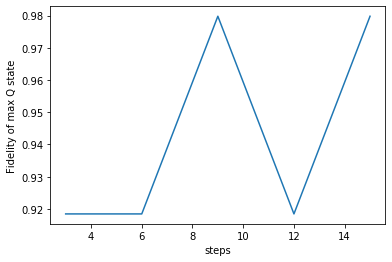

In [114]:
avgarray

plt.plot([3, 6, 9, 12, 15], avgarray)
plt.ylabel('Fidelity of max Q state')
plt.xlabel('steps')
plt.show()

In [43]:
#table[table['new'] == str(right)]
table[table['new'] == '[[ 0.33333333]\n [-0.94280904]]']

,state,gate,new,Q,fidelity
9,[[0.33333333]\n [0.94280904]],3,[[ 0.33333333]\n [-0.94280904]],0,0.857094
0,[[ 0.33333333]\n [-0.94280904]],0,[[ 0.33333333]\n [-0.94280904]],0,0.990427
0,[[-0.43096441]\n [ 0.90236893]],4,[[ 0.33333333]\n [-0.94280904]],0,0.970330
0,[[-0.94280904]\n [ 0.33333333]],1,[[ 0.33333333]\n [-0.94280904]],0,0.515160


In [51]:
table.sort_values("Q", ascending=False).head(20)

,state,gate,new,Q,fidelity
6,[[0.33333333]\n [0.94280904]],0,[[0.33333333]\n [0.94280904]],131.250000,0.857094
0,[[0.]\n [1.]],0,[[0.]\n [1.]],115.500000,0.979796
0,[[ 0.66666667]\n [-0.74535599]],0,[[ 0.66666667]\n [-0.74535599]],15.500000,0.863630
0,[[ 0.66666667]\n [-0.74535599]],3,[[0.66666667]\n [0.74535599]],15.055181,0.863630
15,[[0.66666667]\n [0.74535599]],3,[[ 0.66666667]\n [-0.74535599]],14.684835,0.596963
12,[[0.66666667]\n [0.74535599]],0,[[0.66666667]\n [0.74535599]],14.411301,0.596963
3,[[0.]\n [1.]],3,[[ 0.]\n [-1.]],0.583871,0.979796
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],0.583871,0.979796
5,[[0.]\n [1.]],5,[[0.+0.j]\n [0.+1.j]],0.583871,0.979796
2,[[0.]\n [1.]],2,[[0.-1.j]\n [0.+0.j]],0.583871,0.979796


In [52]:
right

array([[ 0.2      ],
       [-0.9797959]])

Show what actions are taken when following the max Q value for each state action pair

In [523]:
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
tots1 = pd.DataFrame() #Dataframe to store all Q values of all agents
for m in range(0,len(aar)):
    oppa = table.loc[(table.state == str(aar[m]*zero + bar[m]*one))] #select the rows with the initial state
    lol = oppa.sort_values("Q", ascending=False) #sort according to Q value
    top = lol.head(1) #Choose the state action pair with the top Q value
    for n in [0, 1, 2, 3]:
        
        oppa1 = table.loc[(table.state == top['new'].values[n])] #Find the state that results from the top action being applied
        lol = oppa1.sort_values("Q", ascending=False) #find the max Q value of next state
        top1 = lol.head(1)
        
        top = top.append(top1) #add it to the dataframe of steps
        #print(top1)
         
    final = final.append(top) #add this agents top first 4 steps to the other agents top first 4 steps

In [524]:
final

,state,gate,new,Q
4,[[0.]\n [1.]],4,[[ 0.70710678]\n [-0.70710678]],2.969070
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
0,[[ 0.70710678]\n [-0.70710678]],0,[[ 0.70710678]\n [-0.70710678]],3.638243
7,[[0.33333333]\n [0.94280904]],1,[[0.94280904]\n [0.33333333]],4.775119
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
0,[[0.94280904]\n [0.33333333]],0,[[0.94280904]\n [0.33333333]],5.485867
